In [ ]:
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

Saving 01.jpg to 01.jpg


In [ ]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [ ]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "01.jpg"
}

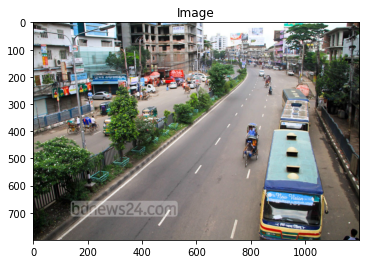

In [ ]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Image", image)

In [ ]:
# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

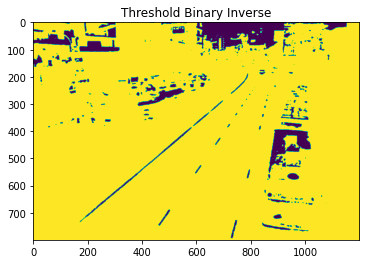

In [ ]:
# apply basic thresholding -- the first parameter is the image
# we want to threshold, the second value is is our threshold
# check; if a pixel value is greater than our threshold (in this
# case, 200), we set it to be *black, otherwise it is *white*
(T, threshInv) = cv2.threshold(blurred, 200, 255,
	cv2.THRESH_BINARY_INV)
plt_imshow("Threshold Binary Inverse", threshInv)

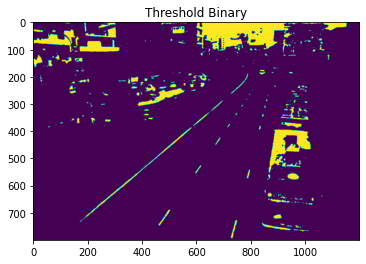

In [ ]:
# using normal thresholding (rather than inverse thresholding)
(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
plt_imshow("Threshold Binary", thresh)

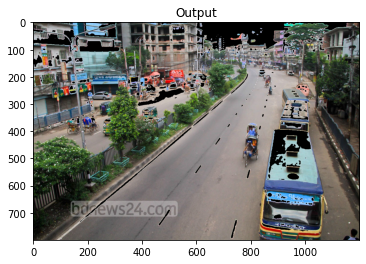

In [ ]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
plt_imshow("Output", masked)

Implementing Otsu thresholding with OpenCV


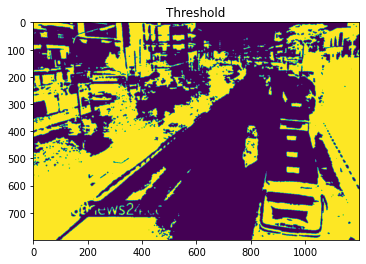

[INFO] otsu's thresholding value: 115.0


In [ ]:
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Threshold", threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))

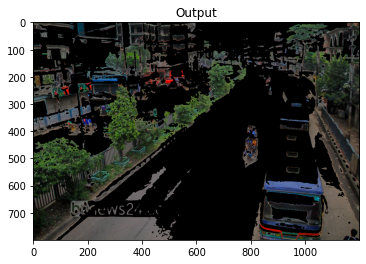

In [ ]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
plt_imshow("Output", masked)